### Exercício 5

#### Pratica 1 -  Dataset 2D (datasets/2d_dataset_desb.csv)

#### Descricao

Atributos

- alpha (numérico): valor x
- beta (numérico): valor y
- y (0 ou 1, numérico): classe

Etapas:
1. Instale a biblioteca de imbalanced-learn
```python
%pip install --user imbalanced-learn
```
1. Importe as bibliotecas necessárias para analise dos dados
```python
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import imblearn
```
2. Carregue o Dataset em um DataFrame
```python
df = pd.read_csv('datasets/2d_dataset_desb.csv')
```
3. Compare os resultados através de classificadores treinados com undersampling, oversampling e adaboosting.
    - Avalie a curva ROC, matriz de confusão e AUC através da abordagem de holdout

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import imblearn
import seaborn as sns

In [5]:
df = pd.read_csv('datasets/2d_dataset_desb.csv')

In [7]:
len(df[df['y'] == 0]), len(df[df['y'] == 1])

(65, 1935)

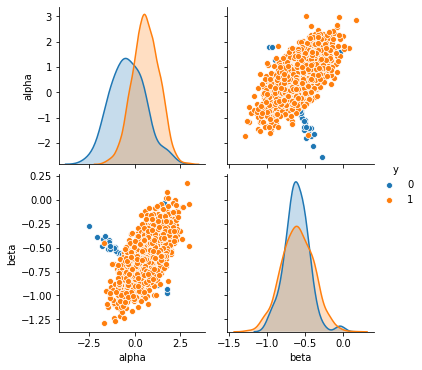

In [9]:
sns.pairplot(df, hue='y')

In [10]:
from sklearn.preprocessing import MaxAbsScaler

In [12]:
featuresNormalizadas = MaxAbsScaler().fit_transform(df.drop('y', axis = 1))

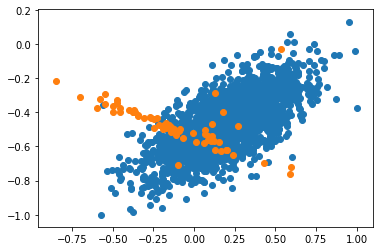

In [19]:
classe0 = featuresNormalizadas[df.y == 0]
classe1 = featuresNormalizadas[df.y == 1]

plt.scatter(classe1[:,0], classe1[:,1])
plt.scatter(classe0[:,0], classe0[:,1])

In [22]:
import imblearn

featuresUnder, labelUnder = imblearn.under_sampling\
.RandomUnderSampler(random_state = 42)\
.fit_resample(featuresNormalizadas, df.y)

In [24]:
classeUnder0 = featuresUnder[labelUnder == 0]
classeUnder1 = featuresUnder[labelUnder == 1]

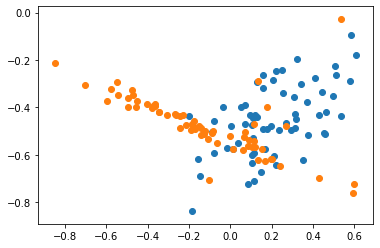

In [28]:
plt.scatter(classeUnder1[:,0], classeUnder1[:,1])
plt.scatter(classeUnder0[:,0], classeUnder0[:,1])

In [30]:
featuresOver, labelOver = imblearn.over_sampling\
.RandomOverSampler(random_state = 42)\
.fit_resample(featuresNormalizadas, df.y)

In [34]:
classeOver0 = featuresOver[labelOver == 0]
classeOver1 = featuresOver[labelOver == 1]

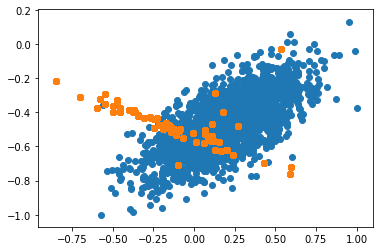

In [37]:
plt.scatter(classeOver1[:,0], classeOver1[:,1])
plt.scatter(classeOver0[:,0], classeOver0[:,1])
plt.show()

In [40]:
len(classeOver0), len(classeOver1) # Balanceado

(1935, 1935)

In [42]:
classe = np.array(df.y)

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
trainFeatures, testFeatures, trainLabel, testLabel = train_test_split(featuresNormalizadas, classe, train_size = 0.7, random_state = 42)

In [47]:
trainFeaturesUnder, trainLabelUnder = imblearn.under_sampling.RandomUnderSampler(random_state = 42).fit_resample(trainFeatures, trainLabel)

In [48]:
trainFeaturesOver, trainLabelOver = imblearn.over_sampling.RandomOverSampler(random_state = 42).fit_sample(trainFeatures, trainLabel)

In [49]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
treeUnder = DecisionTreeClassifier()
treeOver = DecisionTreeClassifier()

tree.fit(trainFeatures, trainLabel)
treeUnder.fit(trainFeaturesUnder, trainLabelUnder)
treeOver.fit(trainFeaturesOver, trainLabelOver)

DecisionTreeClassifier()

In [50]:
from sklearn.metrics import confusion_matrix

predictTree = tree.predict(testFeatures)
predictTreeUnder = treeUnder.predict(testFeatures)
predictTreeOver = treeOver.predict(testFeatures)

In [51]:
confusion_matrix(testLabel, predictTree)

array([[  5,  15],
       [ 14, 566]])

In [52]:
confusion_matrix(testLabel, predictTreeOver)

array([[  5,  15],
       [  8, 572]])

In [53]:
confusion_matrix(testLabel, predictTreeUnder)

array([[ 18,   2],
       [171, 409]])

In [54]:
from sklearn.metrics import roc_curve

In [57]:
predictTreeProba = tree.predict_proba(testFeatures)
predictTreeUnderProba = treeUnder.predict_proba(testFeatures)
predictTreeOverProba =  treeOver.predict_proba(testFeatures)

In [59]:
fprTree, tprTree, limiaresTree = roc_curve(testLabel, predictTreeProba[0:,1], pos_label = 0)
fprTreeUnder, tprTreeUnder, limiaresTreeUnder = roc_curve(testLabel, predictTreeOverProba[0:,1], pos_label = 0)
fprTreeOver, tprTreeOver, limiaresTreeOver = roc_curve(testLabel, predictTreeUnderProba[0:,1], pos_label = 0)

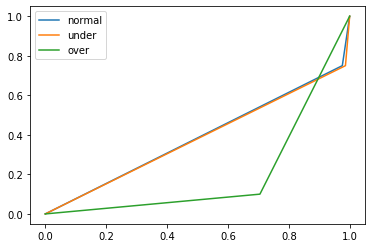

In [61]:
plt.plot(fprTree, tprTree)
plt.plot(fprTreeUnder, tprTreeUnder)
plt.plot(fprTreeOver, tprTreeOver)
plt.legend(['normal', 'under', 'over'])

In [63]:
limiaresTreeOver

array([2., 1., 0.])

In [64]:
from sklearn.ensemble import AdaBoostClassifier

# n_estimators = quantidade de iterações que vai gerar os classificadores 'fracos'
adaboost = AdaBoostClassifier(n_estimators = 100)
adaboost.fit(trainFeatures, trainLabel)

AdaBoostClassifier(n_estimators=100)

In [68]:
predicaoAda = adaboost.predict(testFeatures)
confusion_matrix(testLabel, predicaoAda)

array([[  1,  19],
       [  6, 574]])

In [ ]:
predictAda = adaboost.predict_proba()

In [ ]:
fprAda, tprAda, limiaresAda = roc_curve(testLabel, predictAda)

#### Pratica 2 -  Dataset Income (datasets/income.csv)

#### Descricao

Problema

An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc. The task is to predict if an individual's annual income excceds $50,000 based on census data.

Atributos

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- income: >50K, <=50K

Etapas, fazendo a devida otimização de parametros:
1. Encontre o melhor classificador (determinado através do AUC) para a classificação da classe income. Lembre-se
    - Efetue a busca dos hiperpametros
    - 70% dos dados para treinamento
    - Avalie classificadores obtidos através do dataset original, com undersampling e com oversampling
    - Lembre-se de converter os valores não numéricos
    ```python
    df = pd.get_dummies(df, prefix_sep='_', drop_first=True)
    ```

In [69]:
%pip install --user keras
%pip install --user tensorflow

Note: you may need to restart the kernel to use updated packages.
     |████████████████████████████████| 320.4 MB 114 kB/s  eta 0:00:01
     |████████████████████████████████| 57 kB 5.9 MB/s  eta 0:00:01
     |████████████████████████████████| 1.3 MB 10.8 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 3.3 MB/s eta 0:00:01
     |████████████████████████████████| 459 kB 13.3 MB/s eta 0:00:01
     |████████████████████████████████| 127 kB 8.4 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 2.4 MB/s  eta 0:00:01
     |████████████████████████████████| 3.4 MB 11.4 MB/s eta 0:00:01
     |████████████████████████████████| 6.8 MB 11.9 MB/s eta 0:00:01
     |████████████████████████████████| 88 kB 7.1 MB/s eta 0:00:011
     |████████████████████████████████| 91 kB 8.5 MB/s  eta 0:00:01
     |████████████████████████████████| 779 kB 10.8 MB/s eta 0:00:01
     |████████████████████████████████| 47 kB 3.6 MB/s eta 0:00:01
     |████████████████████████████████| 155 

####  Pratica 3 -  Detecção de Emprestimo Bancário (datasets/creditcard.csv)

#### Descricao

Problema

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase. The goal is to predict the Class column, which is 1 for fraudulent transactions, 0 otherwise

Atributos

- Time : Number of seconds elapsed between this transaction and the first transaction in the dataset
- V1 : normalized buying values in a time window
- V2 : normalized buying values in a time window
- ...
- V28 : normalized buying values in a time window
- Amount: transaction amount
- Class: 1 for fraudulent transactions, 0 otherwise

Etapas:
1. Encontre o melhor classificador (determinado através do AUC) para a classificação da classe loan. Lembre-se
    - Efetue a busca dos hiperpametros
    - 70% dos dados para treinamento
    - Avalie classificadores obtidos através do dataset original, com undersampling e com oversampling
    - Lembre-se de converter os valores não numéricos

####  Pratica 4 -  Detecção de Uso de Seguro (datasets/porto_seguro.csv)

#### Descricao

Problema

In this competition, you will predict the probability that an auto insurance policy holder files a claim. The target columns signifies whether or not a claim was filed for that policy holder.

Atributos

- id: driver id (useless feature for classification)
- features: características foram anonimizadas de acordo com a sua relação (e.g. ind, reg, car, calc)
- target: 0 não usou o seguro, 1 usou seguro

Etapas, fazendo a devida otimização de parametros:
1. Encontre o melhor classificador (determinado através do AUC) para a classificação da classe. Lembre-se
    - Efetue a busca dos hiperpametros
    - 70% dos dados para treinamento
    - Avalie classificadores obtidos através do dataset original, com undersampling e com oversampling
    - Lembre-se de converter os valores não numéricos

####  Pratica 5 -  Detecção de Tipos de Aves (datasets/bird.csv)

#### Descricao

Problema

There are many kinds of birds: pigeons, ducks, ostriches, penguins… Some are good at flying, others can't fly but run fast. Some swim under water, others wading in shallow pool. According to their living environments and living habits, birds are classified into different ecological groups. There are 8 ecological groups of bird. The goal is to find the bird group.

Atributos

- Length and Diameter of Humerus
- Length and Diameter of Ulna
- Length and Diameter of Femur
- Length and Diameter of Tibiotarsus
- Length and Diameter of Tarsometatarsus
- type: SW: Swimming Birds, W: Wading Birds, T: Terrestrial Birds, R: Raptors, P: Scansorial Birds, SO: Singing Birds

Etapas, fazendo a devida otimização de parametros:
1. Encontre o melhor classificador (determinado através do AUC) para a classificação da classe. Lembre-se
    - Efetue a busca dos hiperpametros
    - 70% dos dados para treinamento
    - Avalie classificadores obtidos através do dataset original, com undersampling e com oversampling
    - Lembre-se de converter os valores não numéricos
2. Encontre o melhor classificador para detectar Raptor (R)